# 오전

### 어제 복습

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [5]:
def model_fn(a_layer=None):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(Dense(10, activation='softmax'))
    return model

In [6]:
model = model_fn()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

# 모델 실행
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [8]:
# 손실율 , 정확도
import matplotlib.pyplot as plt

def plot_loss_acc(history):    
    fig, ax1 = plt.subplots()
    plt.title("Train Result")
    line1 = ax1.plot(history.epoch, history.history['loss'],color='red', 
                     label='loss')
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('loss')

    ax2 = ax1.twinx()
    line2 = ax2.plot(history.epoch, history.history['accuracy'], color='blue',
                     label='acc')
    ax2.set_ylabel('accuracy')

    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='center right')
    plt.show()
    
def plot_train_val(history):    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'val'])
    plt.show()

dict_keys(['loss', 'accuracy'])


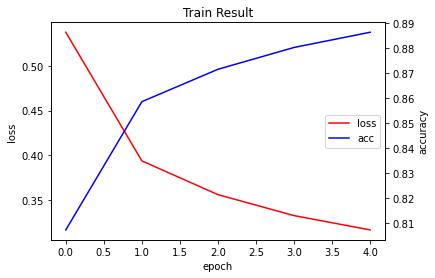

In [9]:
print(history.history.keys())

plot_loss_acc(history)  # 그래프

In [25]:
history.history

{'loss': [0.590941309928894,
  0.44256556034088135,
  0.4013495147228241,
  0.3810086250305176,
  0.36416923999786377,
  0.3525434136390686,
  0.34405064582824707,
  0.3327654004096985,
  0.32267528772354126,
  0.317351371049881,
  0.3133005201816559,
  0.3086412847042084,
  0.30447667837142944,
  0.2954542636871338,
  0.2928309440612793,
  0.29121020436286926,
  0.28333595395088196,
  0.28302910923957825,
  0.27590060234069824,
  0.27199220657348633],
 'accuracy': [0.7925000190734863,
  0.8403333425521851,
  0.8533750176429749,
  0.8608541488647461,
  0.8662916421890259,
  0.8723958134651184,
  0.8742708563804626,
  0.8767291903495789,
  0.8819791674613953,
  0.8818333148956299,
  0.883145809173584,
  0.8855208158493042,
  0.8850625157356262,
  0.8899166584014893,
  0.8912500143051147,
  0.8910624980926514,
  0.8940208554267883,
  0.8947291374206543,
  0.895520806312561,
  0.8978124856948853],
 'val_loss': [0.4374728500843048,
  0.38286706805229187,
  0.385687917470932,
  0.3498952686

In [14]:
# epochs 수 변경
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

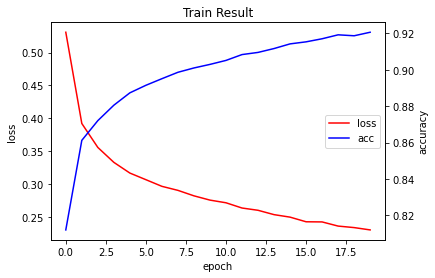

In [15]:
plot_loss_acc(history)

In [19]:
# 검증 데이터 결과
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

In [20]:
history.history

{'loss': [0.5276532173156738,
  0.3897850215435028,
  0.3538677990436554,
  0.33484262228012085,
  0.32276129722595215,
  0.30898913741111755,
  0.3005897104740143,
  0.2926056385040283,
  0.28489041328430176,
  0.279816597700119,
  0.27280551195144653,
  0.2680041790008545,
  0.2613857686519623,
  0.257179856300354,
  0.25403502583503723,
  0.25105226039886475,
  0.24705879390239716,
  0.23867268860340118,
  0.2352050542831421,
  0.23549200594425201],
 'accuracy': [0.8132500052452087,
  0.8609374761581421,
  0.872041642665863,
  0.8802083134651184,
  0.8842708468437195,
  0.890375018119812,
  0.893583357334137,
  0.898520827293396,
  0.9004999995231628,
  0.9004999995231628,
  0.905875027179718,
  0.9062291383743286,
  0.9104583263397217,
  0.911104142665863,
  0.9121249914169312,
  0.9134791493415833,
  0.9158541560173035,
  0.9180208444595337,
  0.918916642665863,
  0.9198333621025085],
 'val_loss': [0.41766560077667236,
  0.3777417838573456,
  0.3787038028240204,
  0.35836726427078

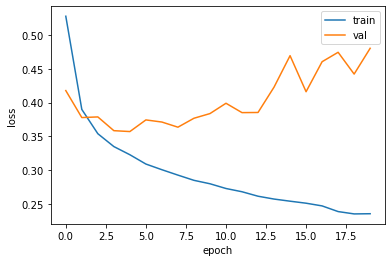

In [21]:
plot_train_val(history)

In [22]:
# 드롭 아웃 : 과적합 해결
model = model_fn(keras.layers.Dropout(0.3))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

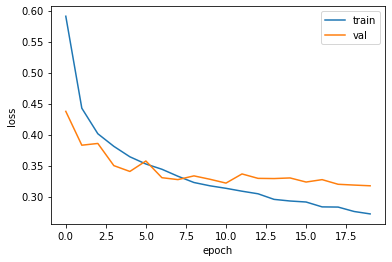

In [24]:
plot_train_val(history)

In [26]:
# 모델 저장과 복원
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=10, verbose=0, 
                    validation_data=(val_scaled, val_target))

In [27]:
model.save_weights('model-weights.h5')
model.save('model-whole.h5')

In [28]:
!dir  *.h5

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: FC77-EBE7

 C:\Users\ygl\Desktop\deeplearning 디렉터리

2021-12-06  오후 03:09         7,572,232 best-cnn-model.h5
2021-12-07  오전 10:07           333,448 model-weights.h5
2021-12-07  오전 10:07           982,688 model-whole.h5
2021-12-02  오후 02:07            62,928 sona_model.h5
               4개 파일           8,951,296 바이트
               0개 디렉터리  170,280,673,280 바이트 남음


In [29]:
import numpy as np

# 검증 결과
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
# 검증 결과와 기존의값 비교 -> 평균
print(np.mean(val_labels == val_target))

0.8796666666666667


In [30]:
# 저장된 모델 로드
model = keras.models.load_model('model-whole.h5')
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
#               metrics='accuracy')

# 검증 데이터로 손실함수 와 정확도 계산
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 930us/step - loss: 0.3317 - accuracy: 0.8797


[0.33169665932655334, 0.8796666860580444]

In [31]:
# 콜백 : 성능을 위해서
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')

model.fit(train_scaled, train_target, epochs=20, verbose=0, 
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [32]:
model = keras.models.load_model('best-model.h5')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 966us/step - loss: 0.3310 - accuracy: 0.88360s - loss: 0.3294 - accuracy: 0.88


[0.3310427665710449, 0.8835833072662354]

In [33]:
# 콜백  : 조기 멈춤 성능을 위해서
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [34]:
print(early_stopping_cb.stopped_epoch)

15


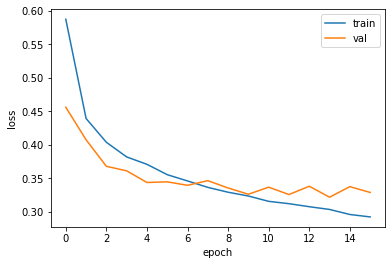

In [35]:
plot_train_val(history)   # 학습자료와 검증자료의 loss 결과 시각화

In [36]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 919us/step - loss: 0.3216 - accuracy: 0.8848


[0.3215600848197937, 0.8847500085830688]

In [37]:
# 가중치 시각화

model = keras.models.load_model('best-cnn-model.h5')
model.layers

(3, 3, 1, 32) (32,)
-0.00043421486 0.10770597


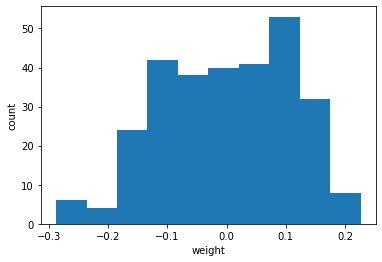

In [38]:
# 가중치 히스토그램으로 확인
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

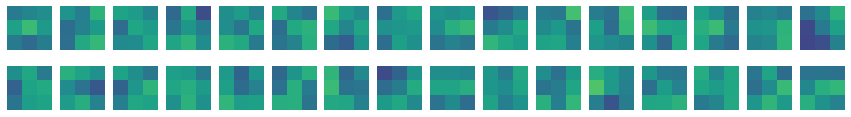

In [39]:
# 가중치 이미지로 확인

fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

In [44]:
# 실행하지 않은 모델의 가중치 확인
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, 
                                          activation='relu', 
                                          padding='same', 
                                          input_shape=(28,28,1)))
no_training_model.layers

In [47]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())
no_training_weights

(3, 3, 1, 32)
-0.005706662 0.08287352


array([[[[-0.03541319, -0.12781137, -0.11499402,  0.03991899,
          -0.00408542,  0.10845576,  0.02068362,  0.13270868,
           0.08868311,  0.04482384, -0.0028892 , -0.00043102,
          -0.13586086,  0.08469371,  0.10102244,  0.05770296,
           0.13530476,  0.09371243,  0.06068993, -0.10374522,
           0.06306584,  0.12360765,  0.07542814, -0.0111098 ,
           0.11115281, -0.09836662,  0.03496893,  0.06421797,
           0.0888927 , -0.11771751,  0.12025328,  0.05251786]],

        [[ 0.09288093, -0.07225693, -0.07267154, -0.1172681 ,
          -0.10397945, -0.00869556,  0.12620588, -0.0177977 ,
           0.11548509, -0.05422263, -0.14091364,  0.14194496,
          -0.08298089,  0.08336879,  0.05789235, -0.07194401,
          -0.05387128, -0.00233908,  0.02048683,  0.05795187,
          -0.08000022, -0.11626388,  0.00699228,  0.13889728,
          -0.08999543,  0.03907248,  0.08537056, -0.13350654,
          -0.01032771, -0.14000393, -0.01240948,  0.0411059 ]],

  

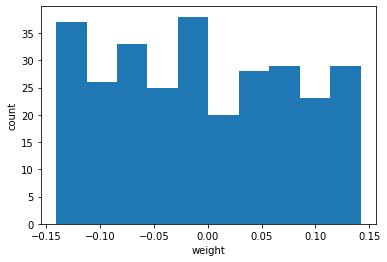

In [46]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

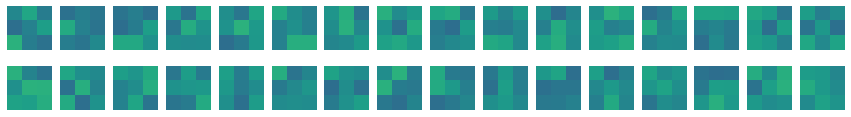

In [48]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], 
                         vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

### 함수형 API

    dense1 = Dense(100, activation='sigmoid')
    dense2 = Dense(10, activation='softmax')

    hidden = dense1(inputs)
    outputs = dense2(hidden)

In [50]:
inputs = keras.Input(shape=28*28,)
print(model.input)
model.layers

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [52]:
# 모델 결합
conv_acti = keras.models.Model(model.input, model.layers[0].output)
print(model.layers[0].output)

KerasTensor(type_spec=TensorSpec(shape=(None, 26, 26, 32), dtype=tf.float32, name=None), name='conv2d/Relu:0', description="created by layer 'conv2d'")


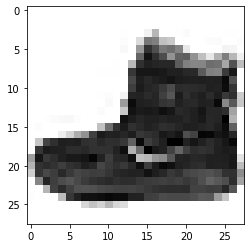

In [53]:
# 특성 맵 시각화
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [54]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0

feature_maps = conv_acti.predict(inputs)

In [55]:
print(feature_maps.shape)

(1, 26, 26, 32)


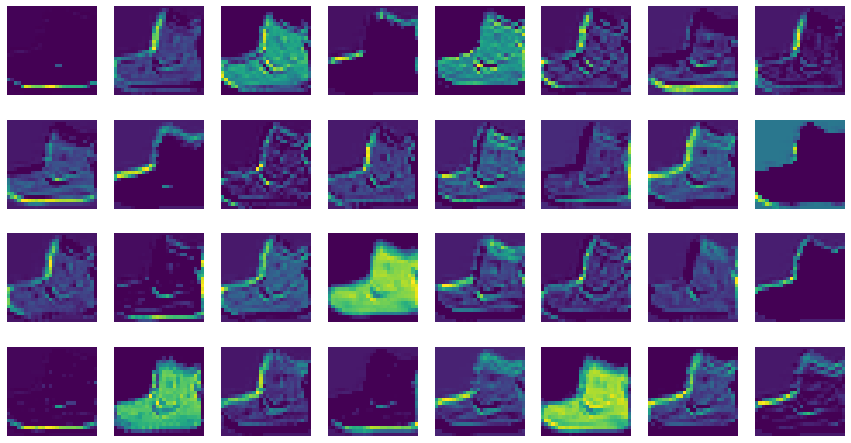

In [56]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

In [57]:
conv2_acti = keras.models.Model(model.input, model.layers[2].output)

feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)
print(feature_maps.shape)

(1, 12, 12, 64)


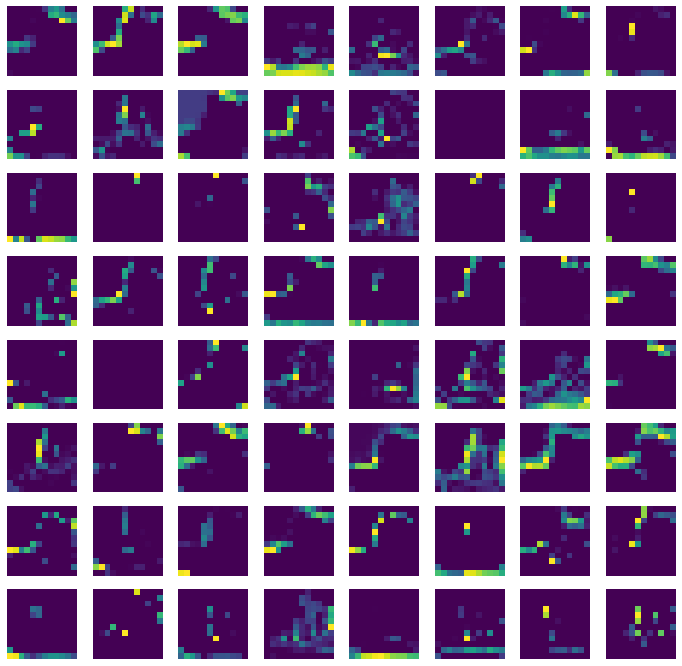

In [58]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

### 텍스트의 토큰화

In [15]:
from keras.preprocessing.text import text_to_word_sequence, Tokenizer

In [16]:
text = ' 해보지 않으면 해낼 수 없다'

# tokenization 결과,  단어로 쪼갠 결과 반환, 리스트로
result = text_to_word_sequence(text)
result

['해보지', '않으면', '해낼', '수', '없다']

In [17]:
# 단어를 빈도수로 정리 
# 토큰화 함수에 적용 후 단어의 빈도수 출력
docs = ['먼저 텍스트의 각 단어를 나누어 토큰화 합니다.',
       '텍스트의 단어로 토큰화 해야 딥러닝에서 인식됩니다.',
       '토큰화 한 결과는 딥러닝에서 사용 할 수 있습니다.',
       ]

In [18]:
token = Tokenizer()   # 토큰화 함수 지정
token.fit_on_texts(docs) # 단어 분리
token_result = token.word_counts # 

In [19]:
print("문장 : ", token.document_count)
print("\n각 단어의 수 : ", token.word_counts)
print("\n각 단어에 매겨진 인덱스 : ", token.word_index)

문장 :  3

각 단어의 수 :  OrderedDict([('먼저', 1), ('텍스트의', 2), ('각', 1), ('단어를', 1), ('나누어', 1), ('토큰화', 3), ('합니다', 1), ('단어로', 1), ('해야', 1), ('딥러닝에서', 2), ('인식됩니다', 1), ('한', 1), ('결과는', 1), ('사용', 1), ('할', 1), ('수', 1), ('있습니다', 1)])

각 단어에 매겨진 인덱스 :  {'토큰화': 1, '텍스트의': 2, '딥러닝에서': 3, '먼저': 4, '각': 5, '단어를': 6, '나누어': 7, '합니다': 8, '단어로': 9, '해야': 10, '인식됩니다': 11, '한': 12, '결과는': 13, '사용': 14, '할': 15, '수': 16, '있습니다': 17}


In [20]:
# 텍스트 리뷰로 부정과 긍정을 도출
docs = ["너무 재밌네요","최고예요","참 잘 만든 영화예요",
        "추천하고 싶은 영화입니다","한번 더 보고싶네요","글쎄요",
        "별로예요","생각보다 지루하네요","연기가 어색해요","재미없어요"]

In [21]:
import numpy as np
# 1은 긍정, 0는 부정
classes  = np.array([1,1,1,1,1,0,0,0,0,0])

In [22]:
# 토큰화
token = Tokenizer()
token.fit_on_texts(docs)

In [23]:
from keras.preprocessing.sequence import pad_sequences

# padding : 데이터의 길이를 4로 길이를 맞춤
x = token.texts_to_sequences(docs)  # 각 문장마다 단어를 분리함, 숫자로 반환
print(x)
padded_x = pad_sequences(x, 4) # 단어의 수가 4가 아니면 채워줌, 많으면 뒤 4개 남겨놓고 앞에서부터 자름
# padded_x

[[1, 2], [3], [4, 5, 6, 7], [8, 9, 10], [11, 12, 13], [14], [15], [16, 17], [18, 19], [20]]


In [26]:
token.index_word

{1: '너무',
 2: '재밌네요',
 3: '최고예요',
 4: '참',
 5: '잘',
 6: '만든',
 7: '영화예요',
 8: '추천하고',
 9: '싶은',
 10: '영화입니다',
 11: '한번',
 12: '더',
 13: '보고싶네요',
 14: '글쎄요',
 15: '별로예요',
 16: '생각보다',
 17: '지루하네요',
 18: '연기가',
 19: '어색해요',
 20: '재미없어요'}

In [31]:
# 단어 임베딩을 포함하여 모델 생성
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding

In [35]:
model = Sequential()
model.add(Embedding(len(token.index_word)+1,8, input_length=4)) # padding 해주고 embedding
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',
             metrics='accuracy')
model.fit(padded_x, classes, epochs=20)
print("\n Accuracy : %.4f" % (model.evaluate(padded_x, classes)[1]))

Epoch 1/20
1/1 [==============================] - 0s 319ms/step - loss: 0.6871 - accuracy: 0.6000
Epoch 2/20
1/1 [==============================] - 0s 3ms/step - loss: 0.6851 - accuracy: 0.6000
Epoch 3/20
1/1 [==============================] - 0s 2ms/step - loss: 0.6831 - accuracy: 0.7000
Epoch 4/20
1/1 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.8000
Epoch 5/20
1/1 [==============================] - 0s 3ms/step - loss: 0.6791 - accuracy: 0.8000
Epoch 6/20
1/1 [==============================] - 0s 3ms/step - loss: 0.6771 - accuracy: 0.8000
Epoch 7/20
1/1 [==============================] - 0s 3ms/step - loss: 0.6751 - accuracy: 0.8000
Epoch 8/20
1/1 [==============================] - 0s 2ms/step - loss: 0.6731 - accuracy: 0.9000
Epoch 9/20
1/1 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.9000
Epoch 10/20
1/1 [==============================] - 0s 2ms/step - loss: 0.6691 - accuracy: 0.9000
Epoch 11/20
1/1 [====================

### RNN

In [36]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [51]:
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Flatten
from keras.preprocessing import sequence
from keras.utils import np_utils

In [39]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = 1000, test_split = 0.2)
print(x_train.shape, y_train.shape)

2121728/2110848 [==============================] - 0s 0us/step
(8982,) (8982,)


In [42]:
# y는 category로 분류돼 있음
# category는 당연하게 max값을 찾음
category = np.max(y_train) + 1
print("category :", category)

category : 46


In [44]:
# x_train 데이터의 갯수와 x_test의 갯수 확인
print(len(x_train), len(x_test))

8982 2246


In [45]:
print(x_train[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [46]:
# 데이터 전처리
# 1. padding -> 기사 하나의 단어가 100개
x_train = sequence.pad_sequences(x_train, maxlen = 100)
x_test = sequence.pad_sequences(x_test, maxlen = 100)

In [48]:
# category로 분류를 하는데 OHE
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [52]:
# 모델 설정
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation = "tanh"))
# 혹시 모르면 flatten()
model.add(Dense(category, activation = "softmax"))

In [55]:
# 모델 컴파일
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = "ACC")

In [56]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 20,
                   batch_size = 100)

Epoch 1/20
90/90 [==============================] - 10s 99ms/step - loss: 2.6096 - ACC: 0.3469 - val_loss: 2.4225 - val_ACC: 0.3620
Epoch 2/20
90/90 [==============================] - 9s 101ms/step - loss: 2.1427 - ACC: 0.4522 - val_loss: 1.9753 - val_ACC: 0.4982
Epoch 3/20
90/90 [==============================] - 11s 118ms/step - loss: 1.8395 - ACC: 0.5189 - val_loss: 1.7753 - val_ACC: 0.5396
Epoch 4/20
90/90 [==============================] - 11s 122ms/step - loss: 1.6956 - ACC: 0.5577 - val_loss: 1.7153 - val_ACC: 0.5659
Epoch 5/20
90/90 [==============================] - 14s 154ms/step - loss: 1.6522 - ACC: 0.5711 - val_loss: 1.6728 - val_ACC: 0.5699
Epoch 6/20
90/90 [==============================] - 17s 195ms/step - loss: 1.5805 - ACC: 0.5935 - val_loss: 1.6559 - val_ACC: 0.5779
Epoch 7/20
90/90 [==============================] - 15s 163ms/step - loss: 1.4610 - ACC: 0.6253 - val_loss: 1.4877 - val_ACC: 0.6287
Epoch 8/20
90/90 [==============================] - 13s 139ms/step - lo

In [61]:
# 테스트의 정확도 출력
print("\n Test ACC : %.4f" % (model.evaluate(x_test, y_test)[1]))

71/71 [==============================] - 1s 13ms/step - loss: 1.2058 - ACC: 0.7021

 Test ACC : 0.7021


In [57]:
def plot_train_val(history):
    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend(["train", "val"])
    plt.show()

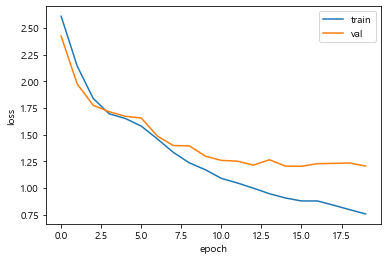

In [62]:
plot_train_val(history)

# 오후

### RNN_CNN

In [232]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [233]:
# 학습셋, 테스트 셋 가져오기
(x_train, y_train), (x_test, y_test) =\
keras.datasets.imdb.load_data(num_words = 5000)

In [234]:
# 데이터 확인하기
# print(x_train.shape, y_train.shape)
# print("\n", x_train[0], len(x_train[0]), len(x_train[1]))
# print("\n", y_train.shape, y_train[0])

In [235]:
# x_test 데이터를 50%는 valid_data로, 50%는 test_data로
from sklearn.model_selection import train_test_split
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test,
                                                   test_size = 0.5)

In [236]:
x_val.shape

(12500,)

In [237]:
# 데이터 전처리 : 각문장의 단어수를 100개로 padding
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen = 100)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen = 100)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen = 100)

In [238]:
x_val.shape

(12500, 100)

In [239]:
# model 설정
model = keras.models.Sequential()

In [240]:
# embedding
model.add(keras.layers.Embedding(5000, 100))

In [241]:
# dropout(50%)
model.add(keras.layers.Dropout(0.5))

In [242]:
# conv(64, kernel = 3, strides = 1)
model.add(keras.layers.Conv1D(64, kernel_size = 3, strides = 1))

In [243]:
# maxpulling(size 2)
model.add(keras.layers.MaxPooling1D(pool_size = 2))

In [244]:
# LSTM(60)
model.add(keras.layers.LSTM(60))
# 혹시 모르면 flatten()

In [245]:
# sigmoid
model.add(keras.layers.Dense(1, activation = "sigmoid"))

In [246]:
# 모델 컴파일 
model.compile(optimizer = "adam", loss = "BCE", 
              metrics= ["ACC"])

In [247]:
# 콜백 설정
checkpoint = keras.callbacks.ModelCheckpoint("best_RNN_CNN_model.h5")
early_stopping = keras.callbacks.EarlyStopping(patience = 2,
                                               restore_best_weights = True)

In [229]:
# 모델 실행
history = model.fit(x_train, y_train, epochs = 20, 
                    validation_data = (x_val, y_val),
                    callbacks = [checkpoint, early_stopping])

Epoch 1/20
782/782 [==============================] - 25s 30ms/step - loss: 0.4222 - ACC: 0.7971 - val_loss: 0.3476 - val_ACC: 0.8494
Epoch 2/20
782/782 [==============================] - 27s 34ms/step - loss: 0.2920 - ACC: 0.8781 - val_loss: 0.3268 - val_ACC: 0.8603
Epoch 3/20
782/782 [==============================] - 31s 40ms/step - loss: 0.2467 - ACC: 0.9018 - val_loss: 0.3271 - val_ACC: 0.8638
Epoch 4/20
782/782 [==============================] - 29s 37ms/step - loss: 0.2111 - ACC: 0.9164 - val_loss: 0.3442 - val_ACC: 0.8549


In [248]:
history1 = model.fit(x_train, y_train, epochs = 20, 
                     validation_data = (x_val, y_val),
                     callbacks = [checkpoint, early_stopping])

Epoch 1/20
782/782 [==============================] - 26s 31ms/step - loss: 0.4176 - ACC: 0.8016 - val_loss: 0.3611 - val_ACC: 0.8426
Epoch 2/20
782/782 [==============================] - 28s 36ms/step - loss: 0.2952 - ACC: 0.8758 - val_loss: 0.3538 - val_ACC: 0.8421
Epoch 3/20
782/782 [==============================] - 36s 46ms/step - loss: 0.2442 - ACC: 0.8998 - val_loss: 0.3308 - val_ACC: 0.8582
Epoch 4/20
782/782 [==============================] - 30s 38ms/step - loss: 0.2041 - ACC: 0.9198 - val_loss: 0.3709 - val_ACC: 0.8482
Epoch 5/20
782/782 [==============================] - 32s 41ms/step - loss: 0.1739 - ACC: 0.9323 - val_loss: 0.3903 - val_ACC: 0.8549


In [230]:
# 모델 summary
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, None, 100)         500000    
                                                                 
 dropout_7 (Dropout)         (None, None, 100)         0         
                                                                 
 conv1d_10 (Conv1D)          (None, None, 64)          19264     
                                                                 
 max_pooling1d_8 (MaxPooling  (None, None, 64)         0         
 1D)                                                             
                                                                 
 lstm_9 (LSTM)               (None, 60)                30000     
                                                                 
 dense_19 (Dense)            (None, 1)                 61        
                                                     

In [250]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, None, 100)         500000    
                                                                 
 dropout_8 (Dropout)         (None, None, 100)         0         
                                                                 
 conv1d_11 (Conv1D)          (None, None, 64)          19264     
                                                                 
 max_pooling1d_9 (MaxPooling  (None, None, 64)         0         
 1D)                                                             
                                                                 
 lstm_10 (LSTM)              (None, 60)                30000     
                                                                 
 dense_20 (Dense)            (None, 1)                 61        
                                                     

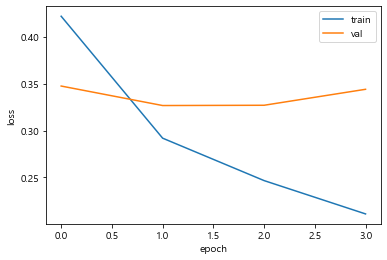

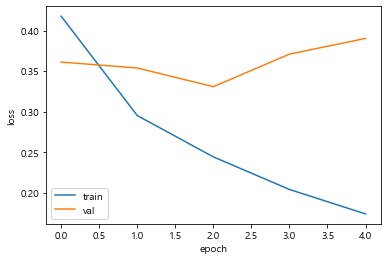

In [251]:
# 모델 학습과 검증의 손실률 그래프로 표현
plot_train_val(history)
plot_train_val(history1)

In [212]:
# 테스트 결과 출력
print("\n ACC : %.4f" % model.evaluate(x_test, y_test)[1])

391/391 [==============================] - 2s 4ms/step - loss: 0.3374 - ACC: 0.8536

 ACC : 0.8536


In [252]:
print("\n ACC : %.4f" % model.evaluate(x_test, y_test)[1])

391/391 [==============================] - 3s 8ms/step - loss: 0.3283 - ACC: 0.8568

 ACC : 0.8568
